In [1]:
using Korg, PyPlot

In [2]:
#first load a linelist.  This one was created using VALD's "extract stellar" feature
#This function loads a linelist file (VALD, Kurucz, and MOOG formats accepted), and returns a Vector of Line objects.
lines = read_linelist("linelist.vald", format="vald")

19236-element Vector{Korg.Line}:
 Fe I 3000.0414 Å
 Fe I 3000.0639 Å
 V I 3000.1011 Å
 Cr II 3000.1718 Å
 Fe I 3000.198 Å
 Fe I 3000.2891 Å
 Fe I 3000.3859 Å
 Ca I 3000.5197 Å
 Ti II 3000.5209 Å
 Co I 3000.5851 Å
 Ti II 3000.7946 Å
 Cr II 3000.8083 Å
 Fe I 3000.8374 Å
 ⋮
 Fe I 8945.52 Å
 Fe I 8947.6451 Å
 Fe I 8948.7164 Å
 Cr I 8949.6385 Å
 Si I 8951.5481 Å
 Ni I 8968.3967 Å
 Ni I 8970.6043 Å
 Fe I 8977.8649 Å
 Cr I 8979.3295 Å
 Ti II 8981.6578 Å
 Fe I 8987.3527 Å
 Fe I 8997.0972 Å

In [3]:
#We also need a model atmosphere.  read_model_atmosphere parses Kurucz-format model atmosphere files, 
#returning either a PlanarAtmosphere or ShellAtmosphere object.  Here's one I downloaded from MARCS.
atm = read_model_atmosphere("s4250_g+1.0_m1.0_t02_st_z+0.00_a+0.00_c+0.00_n+0.00_o+0.00_r+0.00_s+0.00.krz")

Korg.ShellAtmosphere{Float64} with 56 layers

In [4]:
#Pass the linelist and atmosphere to synthesize, along with upper and lower wavelengths (in Å).
#Julia is just-in-time compiled, which means that the first time in each session you synthesize a spectrum, 
#some of the runtime will be taken up by the compiler.  If you run this again, it will be much faster.
solution = synthesize(atm, lines, 5000, 5030);

In [5]:
# "solution" is a NamedTuple containing the spectrum, and a couple other useful objects.
keys(solution)

(:flux, :alpha, :number_densities, :wavelengths)

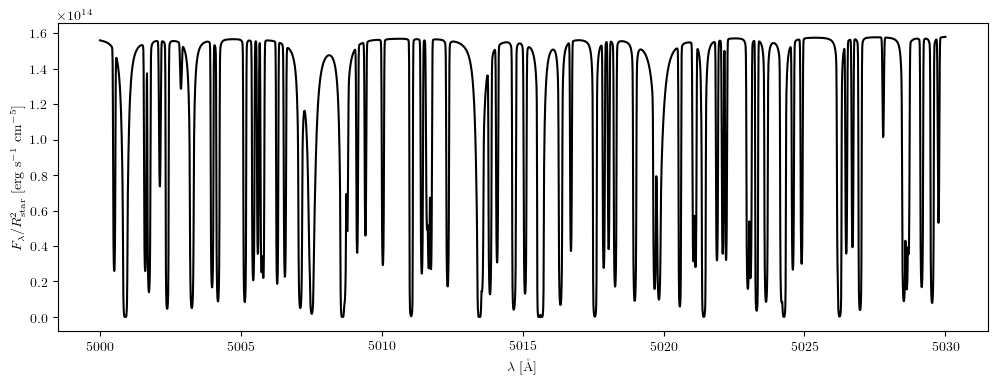

In [6]:
#the spectrum
figure(figsize=(12, 4))
plot(solution.wavelengths, solution.flux, "k-")
xlabel(L"$\lambda$ [\AA]")
ylabel(L"$F_\lambda/R_\mathrm{star}^2$ [erg s$^{-1}$ cm$^{-5}$]");

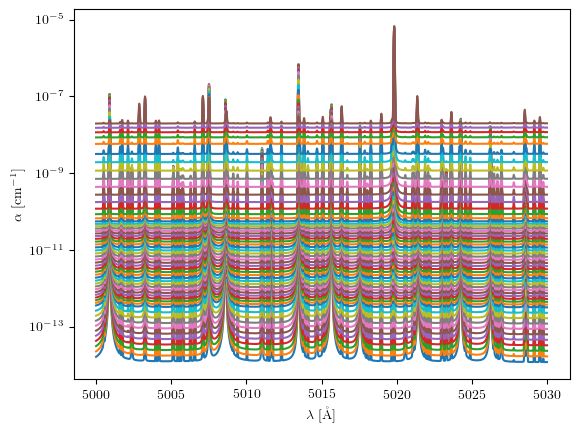

In [7]:
#the absorption coefficient at each layer in the atmosphere
plot(solution.wavelengths, solution.alpha');
yscale("log")
xlabel(L"$\lambda$ [\AA]")
ylabel(L"$\alpha$ [cm$^{-1}$]");

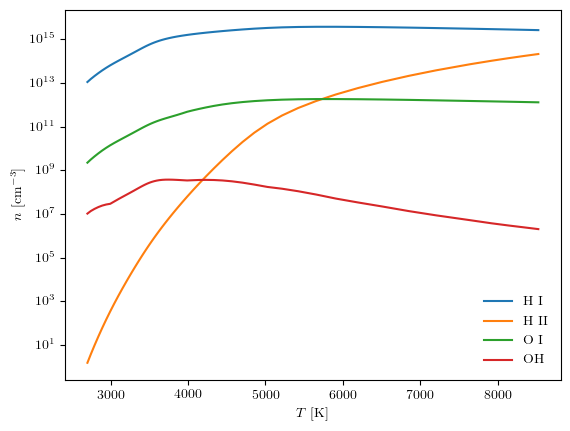

In [8]:
#the number densities of a few species through the atmosphere, indexed by temperature
temps = [l.temp for l in atm.layers]
for species in ["H I", "H II", "O I", "OH"]
    plot(temps, solution.number_densities[Korg.Species(species)], label=species)
end
legend()
yscale("log")
xlabel(L"$T$ [K]")
ylabel(L"$n$ [cm$^{-3}$]");